# **PyTorch Workflow**

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model",
                      5: "saving and loading a model",
                      6: "putting it all together"

}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt


# check PyTorch version
torch.__version__

'2.6.0+cu124'

#  Data (Preparing and Loading)

* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

**Machine learning is a game of two parts:**
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the `Linear Regression` formula.

We'll use an `linear regression` formula to make a straight line with known **parameters**. (Parameter is something that a model learns)



In [3]:
# create knows parameters
weight = 0.7
bias = 0.3

# let's create a range of numbers:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) #unsqueeze adds a dimension (third bracket - [])
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

# Splitting data into training and

* **Training set**: The model learns from this data (like the course materials you study during the semester).
* **Validation set**: The model gets tuned on this data (like the practice exam you take before the final exam).
* **Testing set**: The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).

In [4]:
# create a train/test split
train_split = int(0.8*len(X))
train_split

40

In [5]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Visualization

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="test data")
  #Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")
  plt.legend(prop={"size": 14})

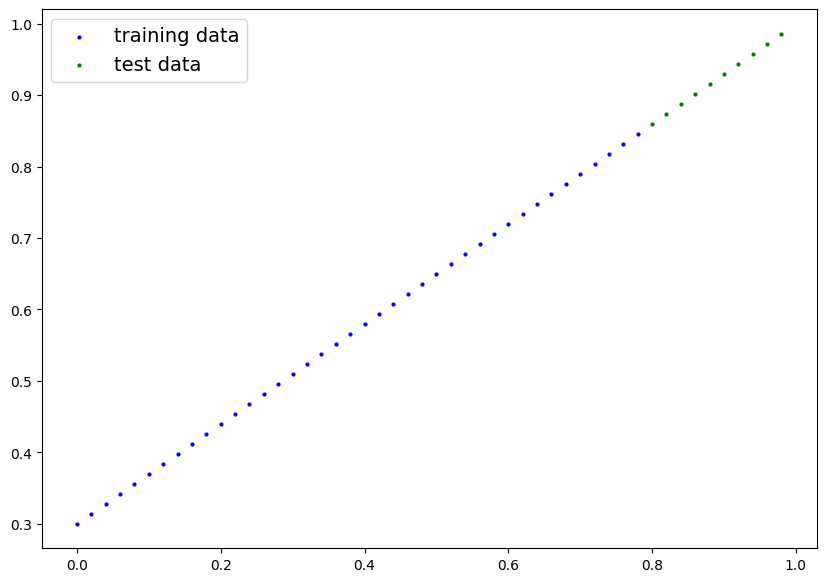

In [7]:
plot_predictions()

# Build a model
our first PyTorch model

what our model does?
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

**How does it do so?**
Through **two** main algorithms :
1. Gradient descent
2. Backpropagation

In [8]:
from torch import nn
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                            requires_grad=True, # <- can we update this value with gradient descent?
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                         requires_grad=True, # <- can we update this value with gradient descent?
                                         dtype=torch.float))

    # forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
    return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)



# PyTorch model building essentials

* torch. nn — contains all of the buildings for computational graphs(a neural network can be considered a computational graph)
* torch. nn. Parameter — what parameters should our model try and
learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module — The base class for all neural network modules,
if you subclass it, you should overwrite forward( )
* torch.optim — this where the optimizers in PyTorch live, they will
help with gradient descent
* def forward() — All nn.Module subclasses require you to overwrite forward( ) , this method defines what happens in the forward
computation

### Checking the contents of our PyTorch model
Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using . `parameters( )`

In [9]:
# create a random seed

torch.manual_seed(42)

# Create a linear regression model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias

(0.7, 0.3)

# Making prediction using `torch.inference_mode()`
To check our model's predictive power, let's see how well it predicts `y_test`  based on `x_test`

When we pass data through our model, it's going to run it through the forward( ) method

##  PyTorch-এর Default Mode vs. Inference Mode

###  কেন PyTorch Default Mode-এ Gradient Calculate করে?

PyTorch-এর **default mode** হলো **training mode**, যেখানে:
- **Computational graph তৈরি হয়**, যাতে পরবর্তী সময়ে backpropagation চালানো যায়।
- **Automatic differentiation চালু থাকে**, যাতে gradient update করা যায়।
- **Prediction-এর সময়ও gradient track হয়**, কারণ PyTorch ধরে নেয় যে training হতে পারে।

কিন্তু **inference (শুধুমাত্র prediction)**-এর সময় gradient দরকার হয় না। তাই এটা manually বন্ধ করতে হয়।

---

## 🎯 Inference-এর সময় Gradient Tracking বন্ধ করার উপায়

### **1️⃣ `torch.no_grad()` ব্যবহার করলে কি হয়?**

- এটি **gradient tracking বন্ধ করে**, তাই কম RAM ব্যবহার হয়।
- কিন্তু কিছু **computational overhead** থেকে যায়।

---

### **2️⃣ `torch.inference_mode()` কেন বেশি optimized?**

- **Computational graph একদম তৈরি হয় না** ✅
- **Memory কম ব্যবহার হয়, execution দ্রুত হয়** ✅
- **Production & Deployment-এর জন্য সেরা পদ্ধতি** ✅

---

## ⚡ Training Mode vs. Inference Mode

| বৈশিষ্ট্য              | Training Mode | Inference Mode |
|----------------------|--------------|---------------|
| **Computational Graph** | তৈরি হয় ✅ | তৈরি হয় না ❌ |
| **Gradient Calculation** | চালু থাকে ✅ | বন্ধ থাকে ❌ |
| **Memory Usage** | বেশি ❌ | কম ✅ |
| **Execution Speed** | ধীর ❌ | দ্রুত ✅ |
| **Weight Update** | হয় ✅ | হয় না ❌ |

---

## 🔥 Inference Mode কেন দরকার?
- **Pre-trained model-এর জন্য gradient দরকার নেই** ❌
- **Memory কম লাগে, execution দ্রুত হয়** ✅
- **Real-time AI applications-এর জন্য পারফেক্ট** ✅
- **Production বা Deployment-এর জন্য সেরা পদ্ধতি** 🚀

---

## 🛠 কখন কোন Mode ব্যবহার করবেন?
✅ **Training-এর জন্য Default Mode**
✅ **কখনো সখনো inference করলে `torch.no_grad()`**
✅ **সবচেয়ে ভালো পারফরম্যান্সের জন্য `torch.inference_mode()`** 🚀

👉 **যদি শুধুমাত্র prediction লাগে, `torch.inference_mode()` ব্যবহার করাই সবচেয়ে ভালো!**



In [12]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [13]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [14]:
# make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

 # You can also do something similar with torch. no grad( )
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

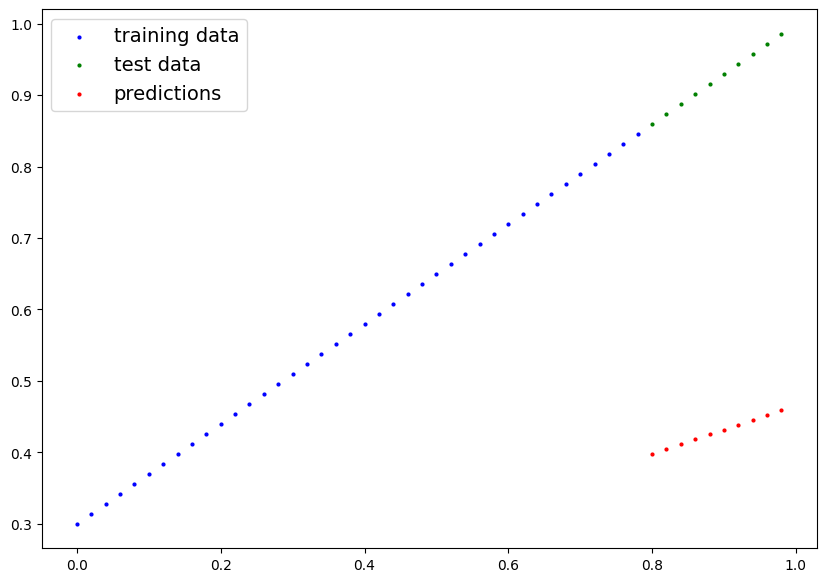

In [16]:
plot_predictions(predictions=y_preds)

# Train Model
The whole idea of training is for a model to move some `unknown` parameters (these may be random) to known parameters

Or in other words from a poor representation of the data to a better representation of the data




One way to measure how poor or how wrong your models predictions are is to use loss function

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we' re going to refer to it as a loss function.


Things we need to train:

* **Loss function:** A function to measure how wrong your model 's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model 's
parameters (e.g. weight & bias)

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict( )

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

PyTorch-এর L1 Loss (Mean Absolute Error)

🚀 L1 Loss কী?

L1 Loss, যাকে Mean Absolute Error (MAE)-ও বলা হয়, এটি PyTorch-এ একটি loss function, যা predictions এবং actual values-এর absolute পার্থক্যের গড় নেয়।

🎯 L1 Loss কিভাবে কাজ করে?

এটি predicted value এবং actual value-এর মধ্যে পার্থক্যের গড় বের করে।

Absolute difference নেয়, যাতে negative values-এর কোনো প্রভাব না থাকে।

Smooth ও Stable optimization দেয়, কারণ এটি outliers-কে বেশি গুরুত্ব দেয় না।

L1 Loss-এর সূত্র:



যেখানে:

 = Actual (ground truth) values

 = Model-এর predicted values

 = Total number of samples



In [19]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

Q: Which loss function and optimizer should I use?

A: This will be problem specific. But with experience, you'll get an idea of what works and what doesnt with your particular
problem set.
For example. for a regression problem (like ours). a loss function of nn.L1Loss() and an optimizer (like ours) will suffice.
But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn. BCELoss( ) (binary cross entropy loss).

# Building a training loop (and a testing loop) in Torch

A couple of things we need in a training loop:

0. Loop through the data
1. forward pass (This involves data moving through our model's `forward()`functions) to make predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward (**Back Propagation**) - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
5. Optimizer step(**Gradient Descent**) - use the optimizer to adjust our model's parameters to try and improve the loss

In [20]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [21]:

# An epoch is one loop through the data...this is a hyperparameter because we set it ourselves
epochs = 200

#Track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]


# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to 'requires_grad=True'

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. optimizer zero grad
#   PyTorch-এ backward() কল করার সময়, আগের gradient গুলো সংগ্রহ হয়, মুছে যায় না।
# 🔹 এজন্য প্রতিটি iteration-এর শুরুতে optimizer.zero_grad() ব্যবহার করে আগের gradients মুছে ফেলা হয়।
# 🔹 নাহলে আগের gradients নতুন gradients-এর সাথে যুক্ত হয়ে যাবে, যা ভুল optimization করবে।

  optimizer.zero_grad()


  # 4. Loss backward (Perform back propagation on the loss with respect to the parameters of the model)
  loss.backward()

  # 5. Optimizer step  (Perform gradient descent)
  optimizer.step()

  # 6. Testing
  model_0.eval() # Turns off gradient tracking
  with torch.inference_mode(): # turns off gradient tracking (no learning needed while testing)

  # 1. Do the forward pass
    test_pred = model_0(X_test)

   # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
  print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")



print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
Loss: 0.3013603389263153
Epoch: 1 | Test: 0.3013603389263153 | Test loss: 0.4675942063331604
Loss: 0.28983935713768005
Epoch: 2 | Test: 0.28983935713768005 | Test loss: 0.4541231691837311
Loss: 0.2783183455467224
Epoch: 3 | Test: 0.2783183455467224 | Test loss: 0.44065219163894653
Loss: 0.26679736375808716
Epoch: 4 | Test: 0.26679736375808716 | Test loss: 0.4271811842918396
Loss: 0.2552763521671295
Epoch: 5 | Test: 0.2552763521671295 | Test loss: 0.41371020674705505
Loss: 0.24375534057617188
Epoch: 6 | Test: 0.24375534057617188 | Test loss: 0.40023916959762573
Loss: 0.23223432898521423
Epoch: 7 | Test: 0.23223432898521423 | Test loss: 0.3867681920528412
Loss: 0.22071333229541779
Epoch: 8 | Test: 0.22071333229541779 | Test loss: 0.37329721450805664
Loss: 0.20919232070446014
Epoch: 9 | Test: 0.20919232070446014 | Test loss: 0.3598262071609497
Loss: 0.1976713240146637
Epoch: 10 | Test: 0.197671

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [23]:
weight, bias

(0.7, 0.3)

In [24]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

In [25]:
# matplotlib works with numpy arrays but not with tensor values
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

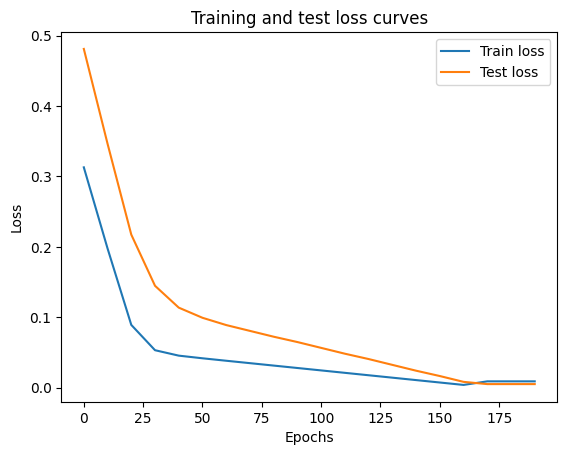

In [26]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [27]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

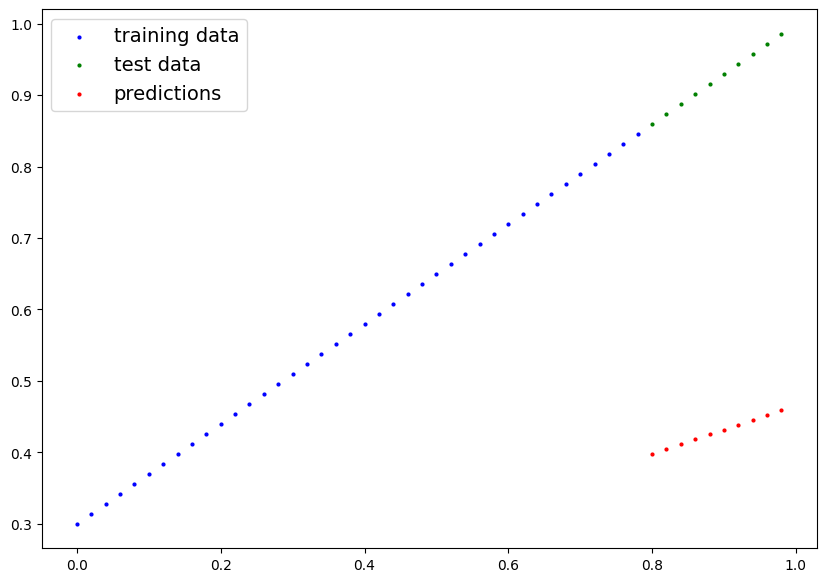

In [28]:
plot_predictions(predictions=y_preds)

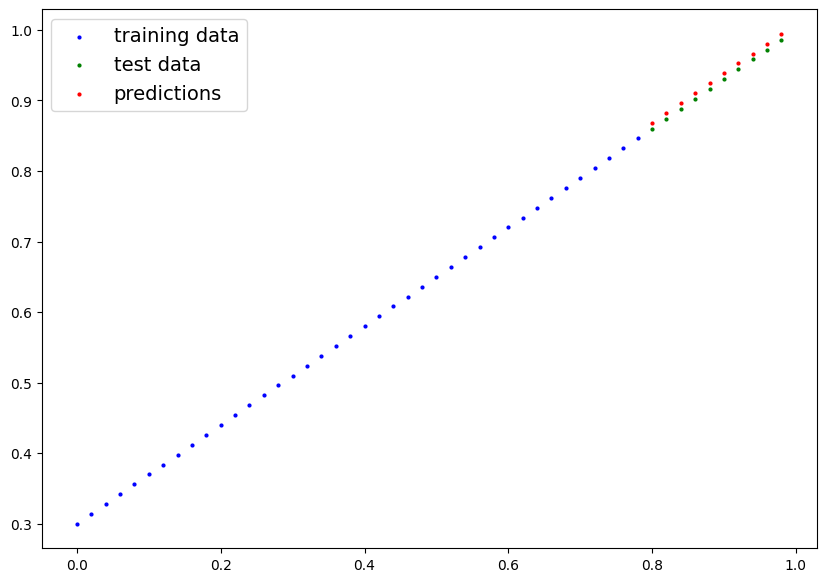

In [29]:
plot_predictions(predictions=y_preds_new)

In [30]:
model_0

LinearRegressionModel()

# Saving a model in PyTorch

There are 3 main methods to know about saving and loading a model in PyTorch:

1. `torch.save()` - allows to save a PyTorch object in python's pickle format.
2. `torch.load()` - allows to load a saved PyTorch object.
3. `torch.nn.Module.()` - This allows to load a model's saved state dictionary


In [31]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [32]:
# Saving our pytorch model
from pathlib import Path

# 1. Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth" #pth is the pytorch object extention
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


In [33]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1668 Mar 27 18:43 01_pytorch_workflow_model.pth


from types import new_class
# Loading a pytorch model

Since we saved our models's  `state_dict()` rather the entire model, we'll create a new instance of our model class and load in the saved state_dict() into that

In [34]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [35]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0
# (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#Put the loaded model in eval mode
loaded_model_0.eval()

LinearRegressionModel()

In [36]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [37]:
# make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [38]:
# make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [39]:
# compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

#  Putting it all together
Let's go back through the steps above and see it all in one place.

In [40]:
# importing pytorch
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# check pytorch version
torch.__version__

'2.6.0+cu124'


Create device—agnostic code.
This means if we've got access to a GPU, our code will use it (for potentially faster computing) .
If no GPU is available, the code will default to using CPL

In [41]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [42]:
!nvidia-smi

Thu Mar 27 18:43:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Data

# Create some data using the linear regression formula `y = weight * X + bias`

In [43]:
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create X and y (features and label)
X = torch.arange (start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [44]:
# split data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [45]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="test data")
  #Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")
  plt.legend(prop={"size": 14})

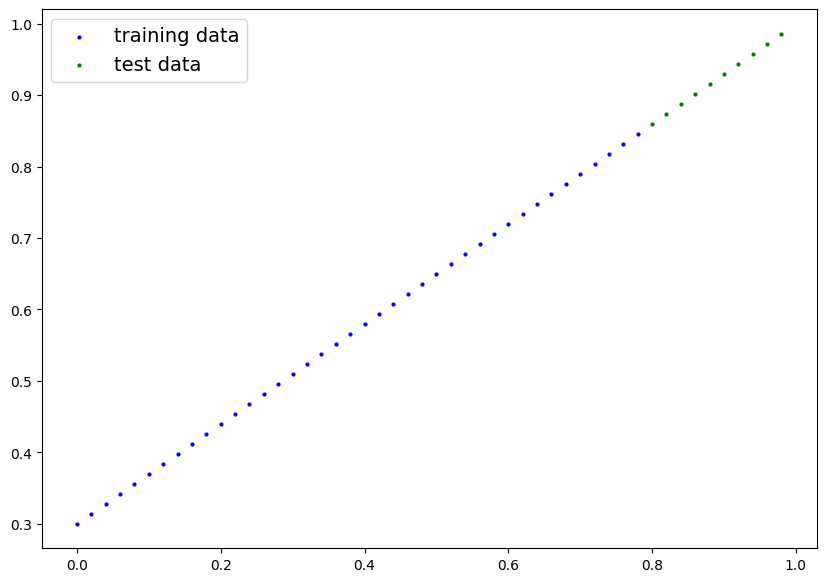

In [46]:
# plot the data

plot_predictions(X_train, y_train, X_test, y_test)

## Building a pytorch linear model (Straightline)

In [55]:
# create a linear model by subclassing nn.Module

class linearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(
        in_features=1,
        out_features=1
    )
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

  # set the manual seed

torch.manual_seed(42)
model_1 = linearRegressionModelV2()
model_1, model_1.state_dict()

(linearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [91]:
from IPython.display import Image, display


image_files = [
  '/content/Screenshot_20250328_125748.png'

]

In [92]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [108]:
# Set the model to use the target device

model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

# Training
For training, we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [109]:
Loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [110]:
# Writing a training loop

torch.manual_seed(42)

epochs = 200


# put data on the target device (Device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

# forward pass
  y_pred = model_1(X_train)

# calculate the loss
  loss = Loss_fn(y_pred, y_train)

# Optimizer zero grad
  optimizer.zero_grad()

# perform backpropagation
  loss.backward()

# optimizer step
  optimizer.step()

### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = Loss_fn(test_pred, y_test)

  # print out what's happening
  if epoch % 1 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 1 | Train loss: 0.010256479494273663 | Test loss: 0.00033081771107390523
Epoch: 2 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 3 | Train loss: 0.010256479494273663 | Test loss: 0.00033081771107390523
Epoch: 4 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 5 | Train loss: 0.010256479494273663 | Test loss: 0.00033081771107390523
Epoch: 6 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 7 | Train loss: 0.010256479494273663 | Test loss: 0.00033081771107390523
Epoch: 8 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 9 | Train loss: 0.010256479494273663 | Test loss: 0.00033081771107390523
Epoch: 10 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 11 | Train loss: 0.010256479494273663 | Test loss: 0.00033081771107390523
Epoch: 12 | Train loss: 0.001264503574930131

In [111]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

# Making and evaluating predictions:

In [132]:
# turn model into evaluation mode
model_1.eval()

# make predictions on the text data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

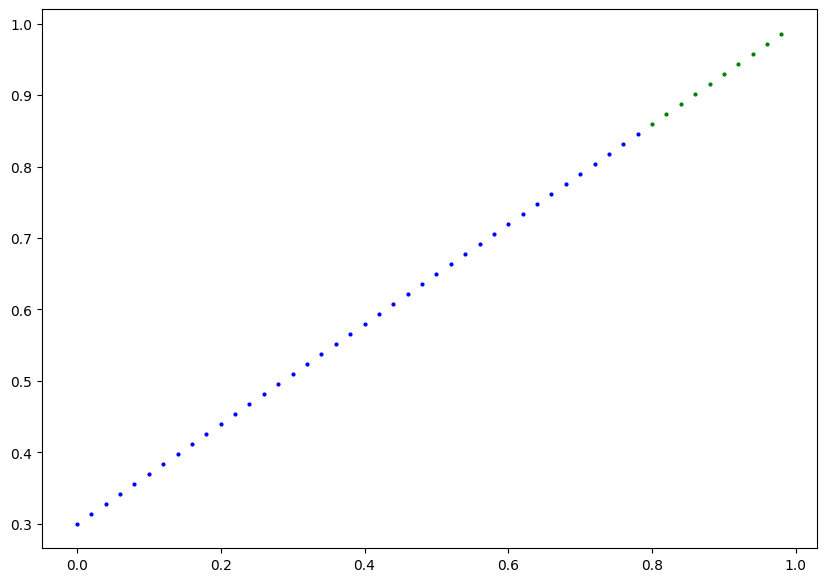

In [133]:
# checking out our model predictions visually:

plot_predictions(predictions=y_preds)
# (This will show error as matplotlib works with cpu, not gpu. And our data is on gpu)

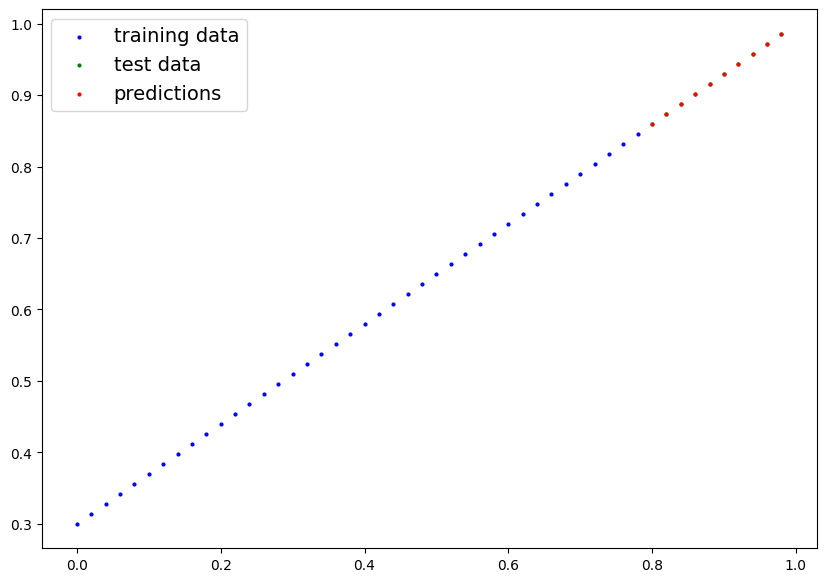

In [126]:
plot_predictions(predictions=y_preds.cpu())


# saving and loading the trained model


In [127]:
from pathlib import Path
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [128]:
model1_state_dict = model_1.state_dict()
model1_state_dict

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [129]:
# Load a PyTorch model
loaded_model_1 = linearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.eval()

linearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [130]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [134]:
# Evaluate loaded model
loaded_model_1.eval()
# Move the model to the same device as X_test
loaded_model_1.to(X_test.device)
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds # Compare loaded model predictions with the previous predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')